INFO 7390-ADVANCES IN DATA SCIENCES AND ARCHITECTURE- SPRING 2018

CAPSTONE PROJECT PORTFOLIO

Shrikumar Patil  -   patil.shr@husky.neu.edu   Section 04
Akshay Shinde -    shinde.ak@husky.neu.edu  Section 04

Analysis of Yelp Dataset for text mining of user Reviews and Rating analysis

PART 1: https://github.com/shrikumarp/ADSSpring18/blob/master/ADS_Project1.ipynb

In this part we perform basic exploratory data analysis on the yelp dataset, with graphs of review counts and text length distribution etc. Further, we start the process of processing the steps. We first start with tokenization, then we perform count vectorization. Then we split the dataset of generated count vectors from the text reviews and corresponding star rating into training and testing set. What we aim to do here is to train and find the algorithm with maximum accuracy, which can classify a test review correctly into a positive review class or a negative review class. We compared many Algorithms, and also improved performance of some of them using hyper-parameter tuning. The most accurate out of all the algorithms was Logistic Regression after parameter tuning with accuracy of 94%.

In [1]:
import numpy as np
import pandas as pd

In [2]:
yelp = pd.read_csv('https://raw.githubusercontent.com/shrikumarp/shrikumarpp1/master/yelp.csv')

In [3]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

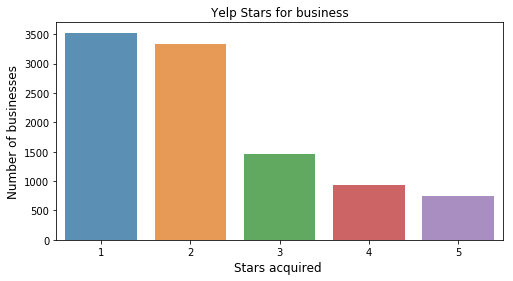

In [5]:
x=yelp['stars'].value_counts()
y=x.sort_index()

plt.figure(figsize=(8,4))
ax= sns.barplot(y.index, x.values, alpha=0.8)
plt.title("Yelp Stars for business")
plt.ylabel('Number of businesses', fontsize=12)
plt.xlabel('Stars acquired ', fontsize=12);
#counting the number of reviews for each of the rating level available to the reviewers.

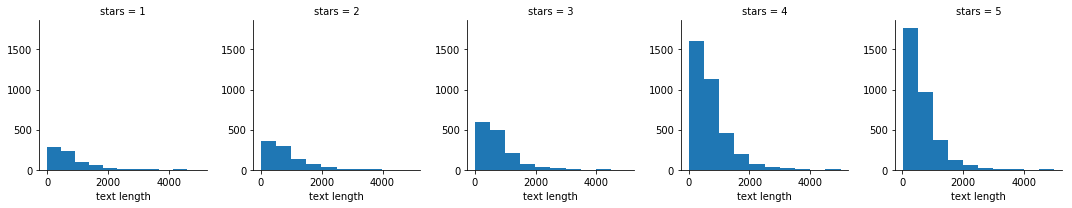

In [7]:
#visualising average text length for star reviews
yelp['text length'] = yelp['text'].apply(len)
g = sns.FacetGrid(yelp,col='stars')
g.map(plt.hist,'text length')

In [13]:
stars = yelp.groupby('stars').mean()
stars
stars.corr()

,cool,useful,funny,text length
cool,1.000000,-0.743329,-0.944939,-0.857664
useful,-0.743329,1.000000,0.894506,0.699881
funny,-0.944939,0.894506,1.000000,0.843461
text length,-0.857664,0.699881,0.843461,1.000000


In [14]:
yelp_class = yelp[(yelp.stars==1) | (yelp.stars==5)]

In [15]:
X = yelp_class['text']
y = yelp_class['stars']

In [16]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

# count vectorization converts the text into integerized count vectors corresponding to the occurence of a particular word in the sentence.

In [17]:
X = cv.fit_transform(X)

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,random_state=101)

In [20]:
# First we use Naive Bayes Algorithm.

from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()

In [21]:
nb.fit(X_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [22]:
predictions = nb.predict(X_test)

In [23]:
from sklearn.metrics import confusion_matrix,classification_report

In [24]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[159  69]
 [ 22 976]]


             precision    recall  f1-score   support

          1       0.88      0.70      0.78       228
          5       0.93      0.98      0.96       998

avg / total       0.92      0.93      0.92      1226



Below is some background of the classification report and confusion matrix as we will be using these a lot to evaluate the classification results.

This gives us:
•	“true positive” for correctly predicted event values.

•	“false positive” for incorrectly predicted event values.

•	“true negative” for correctly predicted no-event values.

•	“false negative” for incorrectly predicted no-event values.
We can summarize this in the confusion matrix as follows:


                    event			no-event
    event		-true positive		false positive
    no-event	-false negative		true negative


This can help in calculating more advanced classification metrics such as precision, recall, specificity and sensitivity of our classifier.
Classification Rate/Accuracy:
Classification Rate or Accuracy is given by the relation:
 
However, there are problems with accuracy. It assumes equal costs for both kinds of errors. A 99% accuracy can be excellent, good, mediocre, poor or terrible depending upon the problem.
Recall:
Recall can be defined as the ratio of the total number of correctly classified positive examples divide to the total number of positive examples. High Recall indicates the class is correctly recognized (small number of FN).
Recall is given by the relation:
 
Precision:
To get the value of precision we divide the total number of correctly classified positive examples by the total number of predicted positive examples. High Precision indicates an example labeled as positive is indeed positive (small number of FP).
Precision is given by the relation:
 
High recall, low precision:This means that most of the positive examples are correctly recognized (low FN) but there are a lot of false positives.
Low recall, high precision:This shows that we miss a lot of positive examples (high FN) but those we predict as positive are indeed positive (low FP)
F-measure:
Since we have two measures (Precision and Recall) it helps to have a measurement that represents both of them. We calculate an F-measure which uses Harmonic Mean in place of Arithmetic Mean as it punishes the extreme values more.
The F-Measure will always be nearer to the smaller value of Precision or Recall.
 
Let’s consider an example now, in which we have infinite data elements of class B and a single element of class A and the model is predicting class A against all the instances in the test data.
Here,
Precision:0.0
Recall : 1.0


.

Support Vector Classifier

In [25]:
from sklearn.model_selection import GridSearchCV
parameters = [{'C': [1, 10, 100], 'kernel': ['linear']},
              {'C': [1, 10, 100], 'kernel': ['rbf']}]

In [26]:
from sklearn.svm import SVC

In [27]:
svmmodel = SVC()

In [28]:
svmmodel.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [29]:
predsvm= svmmodel.predict(X_test)

In [30]:
print(confusion_matrix(y_test,predsvm))
print('\n')
print(classification_report(y_test,predsvm))

[[  0 228]
 [  0 998]]


             precision    recall  f1-score   support

          1       0.00      0.00      0.00       228
          5       0.81      1.00      0.90       998

avg / total       0.66      0.81      0.73      1226



/Users/shrikumarpatil/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Now we use the parameters list defined above to try to tune the parameter 'C' to see if we can squeeze out more accuracy out of this classifier.

In [31]:
grid_search_svm = GridSearchCV(estimator = svmmodel,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)

#GridSearchCV(estimator, param_grid, scoring=None, fit_params=None, n_jobs=1, iid=True, refit=True, cv=None, verbose=0, pre_dispatch=‘2*n_jobs’, error_score=’raise’, return_train_score=’warn’
# scoring and comparison within models is based on accuracy.The most accurate model will be chosen after training and croass validation.

In [32]:
grid_search_svm = grid_search_svm.fit(X_train, y_train)

In [33]:
grid_search_svm.best_score_

0.91573426573426575

In [34]:
grid_search_svm.best_params_

{'C': 1, 'kernel': 'linear'}

As we can wee, the best selected parameters from the Girid search of better parameters turned out to be C= 1 and kernel ='Linear', and this model performed with the accuracy of 91.57%.

.

Using Random Forest Classifier Algorithm

In [35]:
from sklearn.ensemble import RandomForestClassifier
rforest = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)

In [36]:
rforest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [37]:
rfpred= rforest.predict(X_test)

In [38]:
print(confusion_matrix(y_test,rfpred))
print('\n')
print(classification_report(y_test,rfpred))

[[ 81 147]
 [ 19 979]]


             precision    recall  f1-score   support

          1       0.81      0.36      0.49       228
          5       0.87      0.98      0.92       998

avg / total       0.86      0.86      0.84      1226



.

Using Logistic Regression

In [39]:
from sklearn.linear_model  import LogisticRegression
from sklearn.model_selection import GridSearchCV

We set the parameter grid again with a random space of values for parameter C, and we try to get the  maximum accuracy by tuning the hyperparameters.

In [40]:
c_space = np.logspace(-5, 8, 15)
param_grid = {'C': c_space}

In [41]:
logreg = LogisticRegression()

In [42]:
logreg_cv = GridSearchCV(logreg, param_grid, cv= 10)
# here we pass the parameters of the Logistic regression model, the parameter values array and the number of Cross validations as 10 to the GridSearchCV function.

In [43]:
logreg_cv.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'C': array([  1.00000e-05,   8.48343e-05,   7.19686e-04,   6.10540e-03,
         5.17947e-02,   4.39397e-01,   3.72759e+00,   3.16228e+01,
         2.68270e+02,   2.27585e+03,   1.93070e+04,   1.63789e+05,
         1.38950e+06,   1.17877e+07,   1.00000e+08])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [44]:
print("Tuned Logistic Regression Parameters: {}".format(logreg_cv.best_params_)) 
print("Best score is {}".format(logreg_cv.best_score_))

Tuned Logistic Regression Parameters: {'C': 3.7275937203149381}
Best score is 0.9276223776223776


In [45]:
# we predict on the test set
pred = logreg_cv.predict(X_test)

In [46]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          1       0.86      0.79      0.83       228
          5       0.95      0.97      0.96       998

avg / total       0.94      0.94      0.94      1226



As we can see, Logistic regression with hyperparameter tuning performs with the best accuracy with 94%.

.

PART 2: https://github.com/shrikumarp/ADSSpring18/blob/master/ADS_Project2.ipynb

In this part, we use Bidirectional LSTM neural networks to classify the reviews into positive or negative review. The LSTM model performed with accuracy of 81.95.
To understand LSTMs, let us first quickly understand the background of Recurrent Neural Networks. As we are dealing with text data, the context of the sentence is very important. The things said earlier in a review, will still make sense and hold true to provide strong context or basis for the text further in the review. RNN’s are such networks which have the ability to persist information, because they have a loop and a feedback mechanism within them. Each word in a sentence depends greatly on what came before and comes after it. In order to account for this dependency, we use a recurrent neural network. However, traditional RNN’s have a problem of long term dependency. For example, if we are trying to predict the last word of a sentence, and we have some useful appropriate context in the same sentence, then maybe it’s fine, but if you have to predict the last word of this sentence according to the information and context from a sentence or two before that sentence, then RNN’s won’t be of much help as they do not retain long term information. This problem of RNN’s is solved by LSTM’s: Long Short Term Memory networks.
Long Short Term Memory networks – usually just called “LSTMs” – are a special kind of RNN, capable of learning long-term dependencies. They work tremendously well on a large variety of problems, and are now widely used. 
Long Short Term Memory Units are modules that you can place inside of recurrent neural networks. At a high level, they make sure that the hidden state vector h is able to encapsulate information about long term dependencies in the text. 

In RNNs, each word in an input sequence will be associated with a specific time step. In effect, the number of time steps will be equal to the max sequence length. RNN hidden state vector equation:
 

Associated with each time step is also a new component called a hidden state vector ht. From a high level, this vector seeks to encapsulate and summarize all of the information that was seen in the previous time steps. Just like xt is a vector that encapsulates all the information of a specific word, ht is a vector that summarizes information from previous time steps.The hidden state is a function of both the current word vector and the hidden state vector at the previous time step. The sigma indicates that the sum of the two terms will be put through an activation function (normally a sigmoid or tanh). 
Equations for LSTM:
i (t) = σ(W(i) x (t) + U (i) h (t−1)) (Input gate) 

f (t) = σ(W(f) x (t) + U (f) h (t−1)) (Forget gate) 

o (t) = σ(W(o) x (t) + U (o) h (t−1)) (Output/Exposure gate) 

c˜ (t) = tanh(W(c) x (t) + U (c) h (t−1)) (New memory cell) 

c (t) = f (t) ◦ c˜ (t−1) + i (t) ◦ c˜ (t) (Final memory cell) 

h (t) = o (t) ◦ tanh(c (t) )

 


Looking at LSTM units from a more technical viewpoint, the units take in the current word vector xt and output the hidden state vector ht. In these units, the formulation for ht will be a bit more complex than that in a typical RNN. The computation is broken up into 4 components, an input gate, a forget gate, an output gate, and a new memory container.
Each gate will take in xt and ht-1 (not shown in image) as inputs and will perform some computation on them to obtain intermediate states. Each intermediate state gets fed into different pipelines and eventually the information is aggregated to form ht. For simplicity sake, we won't go into the specific formulations for each gate, but it's worth noting that each of these gates can be thought of as different modules within the LSTM that each have different functions. The input gate determines how much emphasis to put on each of the inputs, the forget gate determines the information that we'll throw away, and the output gate determines the final ht based on the intermediate states.

For a more detailed look at LSTM's, please refer Christopher Olah's amazing blogpost : http://colah.github.io/posts/2015-08-Understanding-LSTMs/


In [47]:
#please make sure you have the following libraries installed before continuing running this notebook
#pip install tensorflow
#keras needs tensorflow or other backends as caffe or theano
#pip install keras

Download the Glove text word vector file here: https://www.dropbox.com/s/my83b23ev2h9qgp/glove.6B.50d.txt?dl=1
After downloading please place it in the directory same as that of this notebook or give appropriate path.

Framing Sentiment analysis as a deep Learning Problem
1) Training a word vector generation model (such as Word2Vec) or loading pretrained word vectors

2) Creating an ID's matrix for our training set (We'll discuss this a bit later)

3) RNN (With LSTM units) graph creation

4) Training 

5) Testing


Also, we use Glove vector generation model for word2vec embeddings here.
We're going to be importing two different data structures, one will be a Python list with the 400,000 words, and one will be a 400,000 x 50 dimensional embedding matrix that holds all of the word vector values.

Word Vectors
In order to understand how deep learning can be applied, think about all the different forms of data that are used as inputs into machine learning or deep learning models. Convolutional neural networks use arrays of pixel values, logistic regression uses quantifiable features, and reinforcement learning models use reward signals. The common theme is that the inputs need to be scalar values, or matrices of scalar values. When you think of NLP tasks, however, a data pipeline like this may come to mind.
 
This kind of pipeline is problematic. There is no way for us to do common operations like dot products or backpropagation on a single string. Instead of having a string input, we will need to convert each word in the sentence to a vector.
 
You can think of the input to the sentiment analysis module as being a 16 x D dimensional matrix.
We want these vectors to be created in such a way that they somehow represent the word and its context, meaning, and semantics. For example, we’d like the vectors for the words “love” and “adore” to reside in relatively the same area in the vector space since they both have similar definitions and are both used in similar contexts. The vector representation of a word is also known as a word embedding.
 
Word2Vec
In order to create these word embeddings, we'll use a model that's commonly reffered to as "Word2Vec". Without going into too much detail, the model creates word vectors by looking at the context with which words appear in sentences. Words with similar contexts will be placed close together in the vector space. In natural language, the context of words can be very important when trying to determine their meanings. Taking our previous example of the words "adore" and "love", consider the types of sentences we'd find these words in.
 
From the context of the sentences, we can see that both words are generally used in sentences with positive connotations and generally precede nouns or noun phrases. This is an indication that both words have something in common and can possibly be synonyms. Context is also very important when considering grammatical structure in sentences. Most sentences will follow traditional paradigms of having verbs follow nouns, adjectives precede nouns, and so on. For this reason, the model is more likely to position nouns in the same general area as other nouns. The model takes in a large dataset of sentences (English Wikipedia for example) and outputs vectors for each unique word in the corpus. The output of a Word2Vec model is called an embedding matrix.
 
This embedding matrix will contain vectors for every distinct word in the training corpus. Traditionally, embedding matrices can contain over 3 million word vectors.
The Word2Vec model is trained by taking each sentence in the dataset, sliding a window of fixed size over it, and trying to predict the center word of the window, given the other words. Using a loss function and optimization procedure, the model generates vectors for each unique word. The specifics of this training procedure can get a little complicated, so we’re going to skip over the details for now, but the main takeaway here is that inputs into any Deep Learning approach to an NLP task will likely have word vectors as input.
For more information on the theory behind Word2Vec and how you create your own embeddings, check out Tensorflow's tutorial.: https://www.tensorflow.org/tutorials/word2vec

In [48]:
import numpy as np
import pandas as pd

In [49]:
yelp = pd.read_csv('https://raw.githubusercontent.com/shrikumarp/shrikumarpp1/master/yelp.csv', usecols = ["stars", "text"])

In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

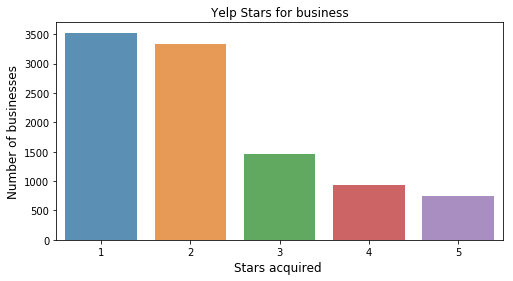

In [51]:
x=yelp['stars'].value_counts()
y=x.sort_index()

plt.figure(figsize=(8,4))
ax= sns.barplot(y.index, x.values, alpha=0.8)
plt.title("Yelp Stars for business")
plt.ylabel('Number of businesses', fontsize=12)
plt.xlabel('Stars acquired ', fontsize=12);
#counting the number of reviews for each of the rating level available to the reviewers.

In [52]:
yelp["labels"]= yelp["stars"].apply(lambda x: 1 if x >= 3  else 0)
yelp=yelp.drop("stars",axis=1)

yelp.head()

,text,labels
0,My wife took me here on my birthday for breakf...,1
1,I have no idea why some people give bad review...,1
2,love the gyro plate. Rice is so good and I als...,1
3,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",1
4,General Manager Scott Petello is a good egg!!!...,1


In [53]:
MAX_NUM_WORDS=1000
MAX_SEQUENCE_LENGTH=100

The MAX_NUM_WORDS value means the number of unique rows to be used in the embedding vector, which coreesponds to the number of unique words to be used. The MAX_SEQUENCE_LENGTH value means the maximum length of a review to use, means the maximum number of words to be taken from a certain review sentence.

Now we need to preprocess the text data in integerized word vectors using the Glove word vectors so that we can give that input to our LSTM neural network. The first step in preprocessing will be tokenization, which will seperate each unique words from the sentence, and we will use pad_sequences to pad the sentences to the maximum sequence length MAX_SEQUENCE_LENGTH defined above.

In [54]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.


In [55]:
texts = yelp["text"].values
labels = yelp["labels"].values

In [56]:
tokenizer = Tokenizer(num_words=MAX_NUM_WORDS)
tokenizer.fit_on_texts(texts) # fit the tokenizer on the review text column
sequences = tokenizer.texts_to_sequences(texts) #text to sequence transformation

In [57]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 30816 unique tokens.


In [58]:
data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)

In [59]:
from keras.utils import to_categorical

In [60]:
labels = to_categorical(np.asarray(labels))
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (10000, 100)
Shape of label tensor: (10000, 2)


In [61]:
VALIDATION_SPLIT=0.2 # we take 20% of the data as validation set.

In [62]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices) # randomly shuffle indices to increase diversity in the training set.
data = data[indices]
labels = labels[indices]
nb_validation_samples = int(VALIDATION_SPLIT * data.shape[0])

In [63]:
# spliting into training and testing set.
x_train = data[:-nb_validation_samples]
y_train = labels[:-nb_validation_samples]
x_val = data[-nb_validation_samples:]
y_val = labels[-nb_validation_samples:]

In [64]:
GLOVE_DIR='../input/glove-global-vectors-for-word-representation/'

Here, we use the GloVe. GloVe is an unsupervised learning algorithm for obtaining vector representations for words. Training is performed on aggregated global word-word co-occurrence statistics from a corpus, and the resulting representations showcase interesting linear substructures of the word vector space.

In [65]:
import os
embeddings_index = {}
f = open(os.path.join('glove.6B.50d.txt'), encoding = "utf8")

#if you are on a windows machine please use the line below and comment out the above line as we need to provide the path reference in windows.
#f = open(os.path.join(GLOVE_DIR, 'glove.6B.50d.txt'), encoding = "utf8")
# download the glove zip from - https://nlp.stanford.edu/projects/glove/
#and put it in the directory of this notebook.
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()

# the above for loop iterates along every word and its corresponding vector given in the Glove text file, 
#and creates a dictionary with the key as the word and the value as the corresponding  integerized word vector. 

In [66]:
print('Found %s word vectors.' % len(embeddings_index))
EMBEDDING_DIM = 50

Found 400000 word vectors.


As we have specified the EMBEDDING_DIM value as 50, and we have found 400000 word vectors, the dimensions of our embedding matrix will be 400000 x 50.

Now the for loop in the next block of code will take each of the word from the unique words collections of word_index which we defined before from out review texts, and search for the corresponding word vector from the embeddings index dictionary.
Now we will put each of the retrieved embedding vector in the embedding matrix, which will be passed as an input to out embedding layer.

In [67]:
embedding_matrix = np.zeros((len(word_index) + 1, EMBEDDING_DIM))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

In [68]:
from keras.layers import Embedding

In [69]:
embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix],
                            input_length=MAX_SEQUENCE_LENGTH,
                            trainable=False)

#keras.layers.Embedding(input_dim, output_dim, embeddings_initializer='uniform', embeddings_regularizer=None, activity_regularizer=None, embeddings_constraint=None, mask_zero=False, input_length=None)

Now as above we have set the sequence length as 100 for each sequence and the output dimensions as 50, we will get a sequence vector of dimension 100 x 50 for each of the 100 words in sequence.

In [70]:
from keras.layers import Bidirectional, GlobalMaxPool1D,Conv1D

In [71]:
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation

In [72]:
from keras.models import Model

In [73]:
inp = Input(shape=(MAX_SEQUENCE_LENGTH,))
x = embedded_sequences = embedding_layer(inp)
x = Bidirectional(LSTM(50, return_sequences=True, dropout=0.1, recurrent_dropout=0.1))(x)
# as we have set the output dimensions of the embedding layer as 50, we set the input neurons of the first LSTM layer succeding that as 50.
x = GlobalMaxPool1D()(x)
x = Dense(50, activation="relu")(x)
x = Dropout(0.1)(x)
x = Dense(2, activation="sigmoid")(x)
model = Model(inputs=inp, outputs=x)
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
#The pooling layer serves to progressively reduce the spatial size of the representation, to reduce the number of 
#parameters and amount of computation in the network, and hence to also control overfitting. 
#It is common to periodically insert a pooling layer between successive convolutional layers in a CNN architecture.
#The pooling operation provides another form of translation invariance.

We use Binary Crossentropy because we are dealing with binary classification problem here, we chose the activation functions as rectified Linear and Sigmoid for the layers.

In [74]:
model.fit(x_train, y_train, validation_data=(x_val, y_val),
          epochs=2, batch_size=128);

Train on 8000 samples, validate on 2000 samples
Epoch 1/2
8000/8000 [==============================] - 15s 2ms/step - loss: 0.4712 - acc: 0.8230 - val_loss: 0.4373 - val_acc: 0.8320
Epoch 2/2
8000/8000 [==============================] - 14s 2ms/step - loss: 0.4107 - acc: 0.8328 - val_loss: 0.4042 - val_acc: 0.8320


In [75]:
score, acc = model.evaluate(x_val, y_val,
                            batch_size=32,
                            verbose=2)
print('Test accuracy:', acc)

Test accuracy: 0.832


Some code snippets have been referenced from:
https://github.com/adeshpande3/LSTM-Sentiment-Analysis/blob/master/Oriole%20LSTM.ipynb
by Adit Deshpande is licensed under the MIT License https://opensource.org/licenses/MIT.


https://www.kaggle.com/poonaml/bidirectional-lstm-spacy-on-yelp-reviews/notebook
open sourced public blog on kaggle.com

In this part, we use a simple item based collaborative filtering recommendation algorithm to recommend a restaurant for the user according to the ratings that user has given to other restaurants.
The way this works is we compute a correlation score for restaurants based on the similarity of the ratings given to them by the users and then scaling the correlation scores according to each user's rating to that restaurant.

In [76]:
yelp = pd.read_csv('https://raw.githubusercontent.com/shrikumarp/shrikumarpp1/master/yelp.csv')

In [77]:
yelp.head()

,business_id,date,review_id,stars,text,type,user_id,cool,useful,funny
0,9yKzy9PApeiPPOUJEtnvkg,2011-01-26,fWKvX83p0-ka4JS3dc6E5A,5,My wife took me here on my birthday for breakf...,review,rLtl8ZkDX5vH5nAx9C3q5Q,2,5,0
1,ZRJwVLyzEJq1VAihDhYiow,2011-07-27,IjZ33sJrzXqU-0X6U8NwyA,5,I have no idea why some people give bad review...,review,0a2KyEL0d3Yb1V6aivbIuQ,0,0,0
2,6oRAC4uyJCsJl1X0WZpVSA,2012-06-14,IESLBzqUCLdSzSqm0eCSxQ,4,love the gyro plate. Rice is so good and I als...,review,0hT2KtfLiobPvh6cDC8JQg,0,1,0
3,_1QQZuf4zZOyFCvXc0o6Vg,2010-05-27,G-WvGaISbqqaMHlNnByodA,5,"Rosie, Dakota, and I LOVE Chaparral Dog Park!!...",review,uZetl9T0NcROGOyFfughhg,1,2,0
4,6ozycU1RpktNG2-1BroVtw,2012-01-05,1uJFq2r5QfJG_6ExMRCaGw,5,General Manager Scott Petello is a good egg!!!...,review,vYmM4KTsC8ZfQBg-j5MWkw,0,0,0


In [78]:
yelp = yelp[['business_id','stars','user_id']]

In [79]:
restrtng = yelp.pivot_table(index=['user_id'],columns=['business_id'],values='stars')
restrtng.head()
#Here we make a pivot table. columns will be restaurants and rows corresponds to the users.

business_id,-0QBrNvhrPQCaeo7mTo0zQ,-0bUDim5OGuv8R0Qqq6J4A,-1N0Z3uM8xbxKS8XiAnaog,-34jE_5dujSWMIOBudQsiQ,-3WVw1TNQbPBzaKCaQQ1AQ,-3xbryp44xhpN4BohxXDdQ,-4A5xmN21zi_TXnUESauUQ,-5EWgRkudDlcCbQSIL_twA,-5rFC4EVrT-v8g1PSEf6Xg,-6O53B-ksqSKzWM6Y9moEQ,...,zrO-RPR3fSdA7sI-IRGWIQ,zruUQvFySeXyEd7_rQixBg,zsApK-QhjBm2mTqq4VWYPQ,zsWJEyP8YyJkux0muGtiVw,zw2iJahOnSxlzmRlF4al6g,zwToyWL4dT1clsFPK9wI2w,zxjMiqlfUuIQRltSuj9FpQ,zxqvU415r_RtZRKDtdbIKQ,zyCrtvCPdSZDhUrH86vbeA,zyYRWnimLbQt9aCCI_2MZw
user_id,,,,,,,,,,,,,,,,,,,,,
--65q1FpAL_UQtVZ2PTGew,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--VxRvXk3b8FwsSbC2Zpxw,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
--rlgfAvvi0BtfRDA1p-VQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-2S6keboidRPly-h5lBfkA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-2XA34d6OGYEUuzqC7yhBg,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
corrMatrix = restrtng.corr()
corrMatrix.head()

business_id,-0QBrNvhrPQCaeo7mTo0zQ,-0bUDim5OGuv8R0Qqq6J4A,-1N0Z3uM8xbxKS8XiAnaog,-34jE_5dujSWMIOBudQsiQ,-3WVw1TNQbPBzaKCaQQ1AQ,-3xbryp44xhpN4BohxXDdQ,-4A5xmN21zi_TXnUESauUQ,-5EWgRkudDlcCbQSIL_twA,-5rFC4EVrT-v8g1PSEf6Xg,-6O53B-ksqSKzWM6Y9moEQ,...,zrO-RPR3fSdA7sI-IRGWIQ,zruUQvFySeXyEd7_rQixBg,zsApK-QhjBm2mTqq4VWYPQ,zsWJEyP8YyJkux0muGtiVw,zw2iJahOnSxlzmRlF4al6g,zwToyWL4dT1clsFPK9wI2w,zxjMiqlfUuIQRltSuj9FpQ,zxqvU415r_RtZRKDtdbIKQ,zyCrtvCPdSZDhUrH86vbeA,zyYRWnimLbQt9aCCI_2MZw
business_id,,,,,,,,,,,,,,,,,,,,,
-0QBrNvhrPQCaeo7mTo0zQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-0bUDim5OGuv8R0Qqq6J4A,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-1N0Z3uM8xbxKS8XiAnaog,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-34jE_5dujSWMIOBudQsiQ,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
-3WVw1TNQbPBzaKCaQQ1AQ,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
#corrMatrix = restrtng.corr(method='pearson', min_periods=100)
#corrMatrix.head()

In [84]:
myrating = restrtng.iloc[0].dropna()
myrating
# we take the ratings taken by the first user. user: --65q1FpAL_UQtVZ2PTGew.

business_id
cOUS79i4vltKIc_hy4OZBg    5.0
j7-YRDU63fw975an55zHGg    5.0
k8JnZBspVOI8kLcQek-Chw    4.0
luCSjoNQ9q_0QIjKKOy2pQ    4.0
r-a-Cn9hxdEnYTtVTB5bMQ    4.0
Name: --65q1FpAL_UQtVZ2PTGew, dtype: float64

In [85]:
similarrest = pd.Series()
for i in range(0, len(myrating.index)):
    temp = corrMatrix[myrating.index[i]].dropna()
    temp = temp.map(lambda x: x * myrating[i])
    similarrest = similarrest.append(temp)

# here we iterate through every restaurant rated, take similarities, drop NA values, and then scale each of them with rating.

In [86]:
similarrest.sort_values(inplace = True, ascending = False)

In [87]:
print (similarrest.head(10))

cOUS79i4vltKIc_hy4OZBg    5.0
r-a-Cn9hxdEnYTtVTB5bMQ    4.0
luCSjoNQ9q_0QIjKKOy2pQ    4.0
pfTwzep_4hRTX_jXoi38cw    4.0
k8JnZBspVOI8kLcQek-Chw    4.0
dtype: float64


In [88]:
similarrest = similarrest.groupby(similarrest.index).sum()
# take the sum of all the restaurants with the calculated scaled score.

In [89]:
similarrest.sort_values(inplace = True, ascending = False)
# sort the values in descending order

In [90]:
similarrest.head(10)

cOUS79i4vltKIc_hy4OZBg    5.0
r-a-Cn9hxdEnYTtVTB5bMQ    4.0
pfTwzep_4hRTX_jXoi38cw    4.0
luCSjoNQ9q_0QIjKKOy2pQ    4.0
k8JnZBspVOI8kLcQek-Chw    4.0
dtype: float64

In [91]:
myrating.index

Index(['cOUS79i4vltKIc_hy4OZBg', 'j7-YRDU63fw975an55zHGg',
       'k8JnZBspVOI8kLcQek-Chw', 'luCSjoNQ9q_0QIjKKOy2pQ',
       'r-a-Cn9hxdEnYTtVTB5bMQ'],
      dtype='object', name='business_id')

In [92]:
filteredrest = similarrest.drop(myrating.index, errors = 'ignore')

# We remove the restaurants which the user has already reviewed.

In [93]:
filteredrest.head(10)

pfTwzep_4hRTX_jXoi38cw    4.0
dtype: float64

Hence above we get the restaurant that is most similar to the restaurants that the user '--65q1FpAL_UQtVZ2PTGew' reviewed, and correlated the most with highly rated restaurants by that user, hence we can recommend this restaurant/food establishment to that user. This method is recommendation based on item or entity similarity, which is also the basis of many recommendation algorithms used by companies such as Amazon or Netflix to recommend the users new products and content.

REFERENCES:

•	https://github.com/adeshpande3/LSTM-Sentiment-Analysis/blob/master/Oriole%20LSTM.ipynb

•	https://machinelearningmastery.com/develop-bidirectional-lstm-sequence-classification-python-keras/
•	http://colah.github.io/posts/2015-08-Understanding-LSTMs/

•	https://link.springer.com/content/pdf/10.1007/978-81-322-1602-5_75.pdf    
Namita Mittal: Text Classification Using Machine Learning Methods-A Survey

•	https://arxiv.org/pdf/1402.4380.pdf
Samuel Danso , Eric Atwell and Owen Johnson
A Comparative Study of Machine Learning Methods for Verbal Autopsy Text Classification

•	https://www.cs.cornell.edu/people/tj/publications/joachims_98a.pdf
Thorsten Joachims
Text Categorization with Support Vector Machines: Learning with Many Relevant Features

•	http://www.cs.utexas.edu/~ml/papers/discotex-melm-03.pdf
Raymond J. Mooney and Un Yong Nahm
Text Mining with Information Extraction

•	https://scholarship.sha.cornell.edu/cgi/viewcontent.cgi?referer=https://www.google.com/&httpsredir=1&article=1003&context=chrreports
Hyun Jeong “Spring” Han, Shawn Mankad
Nagesh Gavirneni
Rohit Verma
What Guests Really Think of Your Hotel: Text Analytics of Online Customer Reviews

•	http://www.cs.ubc.ca/~nando/540-2013/projects/p9.pdf
Exploring the Yelp Data Set: Extracting Useful Features with Text Mining and Exploring Regression Techniques for Count Data

•	http://www.ics.uci.edu/~vpsaini/files/technical_report.pdf
Hitesh Sajnani, Vaibhav Saini, Kusum Kumar , Eugenia Gabrielova , Pramit Choudary, Cristina Lopes, Classifying Yelp reviews into relevant categories


MIT License

Copyright (c) 2018 Shrikumar Patil, Akshay Shinde

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.